**Data Cleaning** <br>
You can drag and drop the dataset to your G drive first. 

In [ ]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import numpy as np 
import os
from IPython.display import display
from pandas import read_csv
from matplotlib import pyplot
import datetime
from google.colab import files
from google.colab import drive
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
import pickle
import csv
import torch
from tqdm import tqdm
import math
import io
from scipy import io
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.layers import ConvLSTM2D

In [ ]:
#@title Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Learning/Carleton/Plan & Desin Comp Networks/Project/Network Traffic Prediction/Dataset/Dataset-Unicauca-Version2-87Atts.csv')
#,names=['session_id','timestamp','item_id','price','quantity'])

In [ ]:
# geting the shape and data types of the dataset
print(df.shape)
print(df.dtypes)

(3577296, 87)
Flow.ID                         object
Source.IP                       object
Source.Port                      int64
Destination.IP                  object
Destination.Port                 int64
Protocol                         int64
Timestamp                       object
Flow.Duration                    int64
Total.Fwd.Packets                int64
Total.Backward.Packets           int64
Total.Length.of.Fwd.Packets      int64
Total.Length.of.Bwd.Packets    float64
Fwd.Packet.Length.Max            int64
Fwd.Packet.Length.Min            int64
Fwd.Packet.Length.Mean         float64
Fwd.Packet.Length.Std          float64
Bwd.Packet.Length.Max            int64
Bwd.Packet.Length.Min            int64
Bwd.Packet.Length.Mean         float64
Bwd.Packet.Length.Std          float64
Flow.Bytes.s                   float64
Flow.Packets.s                 float64
Flow.IAT.Mean                  float64
Flow.IAT.Std                   float64
Flow.IAT.Max                   float64
Flow.IAT.Mi

In [ ]:
# Print dataset head
df.head(5)

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,132,110414.0,6,6,6.000000,0.000000,4380,1187,2007.527273,768.481689,2.428355e+06,1.691453e+03,598.986842,816.061346,3880.0,1,45523.0,2167.761905,1319.384512,5988.0,698.0,41178.0,762.555556,1230.348220,5133.0,1.0,0,0,0,0,440,1100,4.832722e+02,1208.180480,6,4380,1417.333333,1121.579194,1.257940e+06,0,0,0,0,1,0,0,0,2,1435.74026,6.000000,2007.527273,440,0,0,0,0,0,0,22,132,55,110414,256,490,21,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,12,0.0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1.0,1,1.0,1.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0,9.00000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,490,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,674,0.0,337,0,224.666667,194.567041,0,0,0.000000,0.000000,6.740000e+08,3.000000e+06,0.500000,0.707107,1.0,0,1.0,0.500000,0.707107,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,96,0,3.000000e+06,0.000000,0,337,252.750000,168.500000,2.839225e+04,0,1,0,0,1,0,0,0,0,337.00000,224.666667,0.000000,96,0,0,0,0,0,0,3,674,0,0,888,-1,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110.0,0,0.0,0.000000,0.000000,0.0,0.0,107.0,53.500000,75.660426,107.0,0.0,0,0,0,0,32,96,4.608295e+03,13824.884793,0,0,0.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,3,0.00000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,3,0,888,490,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,1076,0.0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313.0,0,78068.0,19517.000000,25758.502350,54313.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,100,0,6.404673e+01,0.000000,6,529,267.500000,286.458898,8.205870e+04,0,1,0,0,1,0,0,0,0,321.00000,215.200000,0.000000,100,0,0,0,0,0,0,5,1076,0,0,253,-1,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


From these results, we learn that the dataset has 3577296 rows.



Now we can run through the checklist of “dirty” data types and fix them one by one.

Let’s get started.

**1.Missing data** <br>
Dealing with missing data/value is one of the most tricky but common parts of data cleaning. While many models can live with other problems of the data, most models don’t accept missing data.

**How to find missing data?**

**1.1. Missing Data Percentage List** <br>
When there are many features in the dataset, we can make a list of missing data % for each feature.([1](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d))


In [ ]:
for col in df.columns:  # Go through all columns of dataset to find the missing data  
    pct_missing = np.mean(df[col].isnull()) # isnull() function detect missing values in the given series object
    print('{} - {}%'.format(col, round(pct_missing*100)))  # make a list of missing data % for each feature

Flow.ID - 0%
Source.IP - 0%
Source.Port - 0%
Destination.IP - 0%
Destination.Port - 0%
Protocol - 0%
Timestamp - 0%
Flow.Duration - 0%
Total.Fwd.Packets - 0%
Total.Backward.Packets - 0%
Total.Length.of.Fwd.Packets - 0%
Total.Length.of.Bwd.Packets - 0%
Fwd.Packet.Length.Max - 0%
Fwd.Packet.Length.Min - 0%
Fwd.Packet.Length.Mean - 0%
Fwd.Packet.Length.Std - 0%
Bwd.Packet.Length.Max - 0%
Bwd.Packet.Length.Min - 0%
Bwd.Packet.Length.Mean - 0%
Bwd.Packet.Length.Std - 0%
Flow.Bytes.s - 0%
Flow.Packets.s - 0%
Flow.IAT.Mean - 0%
Flow.IAT.Std - 0%
Flow.IAT.Max - 0%
Flow.IAT.Min - 0%
Fwd.IAT.Total - 0%
Fwd.IAT.Mean - 0%
Fwd.IAT.Std - 0%
Fwd.IAT.Max - 0%
Fwd.IAT.Min - 0%
Bwd.IAT.Total - 0%
Bwd.IAT.Mean - 0%
Bwd.IAT.Std - 0%
Bwd.IAT.Max - 0%
Bwd.IAT.Min - 0%
Fwd.PSH.Flags - 0%
Bwd.PSH.Flags - 0%
Fwd.URG.Flags - 0%
Bwd.URG.Flags - 0%
Fwd.Header.Length - 0%
Bwd.Header.Length - 0%
Fwd.Packets.s - 0%
Bwd.Packets.s - 0%
Min.Packet.Length - 0%
Max.Packet.Length - 0%
Packet.Length.Mean - 0%
Packet.Length

As you can see, This produces a list showing the percentage of missing values for each of the features.

This list is a useful summary that can complement the heatmap visualization.([1](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d))

**3. Unnecessary Data** <br>
**3.1. Uninformative / Repetitive data** <br>
Sometimes one feature is uninformative because it has too many rows being the same value. <br>
**How to find out?** <br>
We can create a list of features with a high percentage of the same value.
For example, we specify below to show features with over 95% rows being the same value.([1](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d))

In [ ]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Protocol: 99.87921%
6     3572975
17       2684
0        1637
Name: Protocol, dtype: int64

Bwd.PSH.Flags: 100.00000%
0    3577296
Name: Bwd.PSH.Flags, dtype: int64

Fwd.URG.Flags: 100.00000%
0    3577296
Name: Fwd.URG.Flags, dtype: int64

Bwd.URG.Flags: 100.00000%
0    3577296
Name: Bwd.URG.Flags, dtype: int64

FIN.Flag.Count: 99.29628%
0    3552122
1      25174
Name: FIN.Flag.Count, dtype: int64

RST.Flag.Count: 99.93344%
0    3574915
1       2381
Name: RST.Flag.Count, dtype: int64

CWE.Flag.Count: 100.00000%
0    3577296
Name: CWE.Flag.Count, dtype: int64

ECE.Flag.Count: 99.93434%
0    3574947
1       2349
Name: ECE.Flag.Count, dtype: int64

Fwd.Avg.Bytes.Bulk: 100.00000%
0    3577296
Name: Fwd.Avg.Bytes.Bulk, dtype: int64

Fwd.Avg.Packets.Bulk: 100.00000%
0    3577296
Name: Fwd.Avg.Packets.Bulk, dtype: int64

Fwd.Avg.Bulk.Rate: 100.00000%
0    3577296
Name: Fwd.Avg.Bulk.Rate, dtype: int64

Bwd.Avg.Bytes.Bulk: 100.00000%
0    3577296
Name: Bwd.Avg.Bytes.Bulk, dtype: int64

Bwd.Avg.

In [ ]:
########Removing Unnecessary Culomns
df = df.drop(["Flow.Duration","Fwd.Packet.Length.Max","Fwd.Packet.Length.Min","Fwd.Packet.Length.Mean","Fwd.Packet.Length.Std","Bwd.Packet.Length.Max","Bwd.Packet.Length.Min","Bwd.Packet.Length.Mean","Bwd.Packet.Length.Std",
              "Flow.IAT.Mean","Flow.IAT.Std","Flow.IAT.Max","Flow.IAT.Min","Fwd.IAT.Total","Fwd.IAT.Mean","Fwd.IAT.Std","Fwd.IAT.Max","Fwd.IAT.Min","Bwd.IAT.Total",
              "Bwd.IAT.Mean","Bwd.IAT.Std","Bwd.IAT.Max","Bwd.IAT.Min","Min.Packet.Length","Max.Packet.Length","Packet.Length.Mean","Packet.Length.Std","Packet.Length.Variance","Down.Up.Ratio","Avg.Fwd.Segment.Size",
              "Avg.Bwd.Segment.Size","Fwd.Header.Length.1","Fwd.Avg.Bytes.Bulk","Fwd.Avg.Packets.Bulk","Fwd.Avg.Bulk.Rate","Bwd.Avg.Bytes.Bulk","Bwd.Avg.Packets.Bulk","Bwd.Avg.Bulk.Rate","Subflow.Fwd.Packets","Subflow.Fwd.Bytes",
              "Subflow.Bwd.Packets","Subflow.Bwd.Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd","min_seg_size_forward","Active.Mean","Active.Std","Active.Max","Active.Min","Idle.Mean","Idle.Std",
              "Idle.Max","Idle.Min","Label"], axis=1)

In [ ]:
for col in df.columns:  # Go through all columns of dataset to find the missing data  
    pct_missing = np.mean(df[col].isnull()) # isnull() function detect missing values in the given series object
    print('{} - {}%'.format(col, round(pct_missing*100)))  # make a list of missing data % for each feature

Flow.ID - 0%
Source.IP - 0%
Source.Port - 0%
Destination.IP - 0%
Destination.Port - 0%
Protocol - 0%
Timestamp - 0%
Flow.Duration - 0%
Total.Fwd.Packets - 0%
Total.Backward.Packets - 0%
Total.Length.of.Fwd.Packets - 0%
Total.Length.of.Bwd.Packets - 0%
Fwd.Packet.Length.Max - 0%
Fwd.Packet.Length.Min - 0%
Fwd.Packet.Length.Mean - 0%
Fwd.Packet.Length.Std - 0%
Bwd.Packet.Length.Max - 0%
Bwd.Packet.Length.Min - 0%
Bwd.Packet.Length.Mean - 0%
Bwd.Packet.Length.Std - 0%
Flow.Bytes.s - 0%
Flow.Packets.s - 0%
Flow.IAT.Mean - 0%
Flow.IAT.Std - 0%
Flow.IAT.Max - 0%
Flow.IAT.Min - 0%
Fwd.IAT.Total - 0%
Fwd.IAT.Mean - 0%
Fwd.IAT.Std - 0%
Fwd.IAT.Max - 0%
Fwd.IAT.Min - 0%
Bwd.IAT.Total - 0%
Bwd.IAT.Mean - 0%
Bwd.IAT.Std - 0%
Bwd.IAT.Max - 0%
Bwd.IAT.Min - 0%
Fwd.PSH.Flags - 0%
Bwd.PSH.Flags - 0%
Fwd.URG.Flags - 0%
Bwd.URG.Flags - 0%
Fwd.Header.Length - 0%
Bwd.Header.Length - 0%
Fwd.Packets.s - 0%
Bwd.Packets.s - 0%
Min.Packet.Length - 0%
Max.Packet.Length - 0%
Packet.Length.Mean - 0%
Packet.Length

In [ ]:
#######Create a culumn for sum up the Total.Fwd.Packets	and Total.Backward.Packets
df['Total.Num.Packets']=df['Total.Fwd.Packets']+df['Total.Backward.Packets']

#######Create a culumn for sum up the Total.Length.of.Fwd.Packets and	Total.Length.of.Bwd.Packets
df['Total.bytes.of.Packets']=df['Total.Length.of.Fwd.Packets']+df['Total.Length.of.Bwd.Packets']


In [ ]:
df.head(3)

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP


**4. Inconsistent data** <br>
It is also crucial to have the dataset follow specific standards to fit a model. We need to explore the data in different ways to find out the inconsistent data. Much of the time, it depends on observations and experience. There is no set code to run and fix them all.
Below we cover some inconsistent data types.

**4.1 Inconsistent Formats** <br>
Another standardization we need to perform is the data formats. One example is to convert the feature from string to DateTime format. <br>
**How to find out?** <br>
The feature timestamp is in string format while it represents dates.([1](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d))

In [ ]:
print(type(df.Timestamp[0]))

<class 'str'>


In [ ]:
df['Timestamp']=pd.to_datetime(df['Timestamp'], format="%d/%m/%Y%H:%M:%S")

In [ ]:
df['Timestamp'].head()
df['Timestamp'].dtype

dtype('<M8[ns]')

In [ ]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [ ]:
print(type(df.Timestamp[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


**Sort the dataframe besed on the Timestamp**

In [ ]:
df['Dates'] = df['Timestamp'].dt.date
df['Time'] = df['Timestamp'].dt.time

In [ ]:
df.head(5)

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName,Dates,Time
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,2017-04-26 11:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY,2017-04-26,11:11:17
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,2017-04-26 11:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY,2017-04-26,11:11:17
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,2017-04-26 11:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP,2017-04-26,11:11:17
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,2017-04-26 11:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP,2017-04-26,11:11:17
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,2017-04-26 11:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY,2017-04-26,11:11:17


In [ ]:
print(type(df.Dates[0]))

<class 'datetime.date'>


In [ ]:
####Keep the records belong to April 26
##filtered_df = df['Dates'] == '2017-04-26'
df['Dates'] = pd.to_datetime(df['Dates'], format='%Y-%m-%d')
filtered_df = df.query("Dates >= '2017-04-26' \
                       and Dates < '2017-04-27'")

In [ ]:
filtered_df.head()

In [ ]:
df.shape

(3577296, 36)

In [ ]:
filtered_df.shape

In [ ]:
filtered_df.sort_values(by='Time',ascending=True,inplace=True)
filtered_df.head(5)

In [ ]:
feature_names = ['Destination.IP', 'Destination.Port', 'Source.IP', 'Init_Win_bytes_forward',
 'min_seg_size_forward', 'Fwd.Packet.Length.Max', 'Init_Win_bytes_backward', 'Flow.IAT.Max',
 'Source.Port', 'Flow.Duration', 'Fwd.Packet.Length.Std', 'Bwd.IAT.Total',
 'Avg.Fwd.Segment.Size', 'Fwd.Packets.s', 'Fwd.IAT.Total', 'Fwd.IAT.Max',
 'Fwd.Packet.Length.Mean', 'Subflow.Fwd.Bytes', 'Flow.Bytes.s', 'Min.Packet.Length',
 'Total.Length.of.Fwd.Packets', 'Average.Packet.Size', 'Total.Length.of.Bwd.Packets',
 'Packet.Length.Mean', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Flow.IAT.Min',
 'Bwd.IAT.Mean', 'Bwd.Packet.Length.Max', 'Subflow.Fwd.Packets', 'Total.Fwd.Packets',
 'Total.Backward.Packets', 'Bwd.Header.Length', 'Subflow.Bwd.Bytes', 'Subflow.Bwd.Packets', 
 'Idle.Mean', 'Fwd.IAT.Min', 'Down.Up.Ratio', 'Idle.Min']

In [ ]:
# Convert IP addresses into numbers
import socket, struct
def ip2int(ip):
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

In [ ]:
# Converting IP addresses into numbers
df['Source.IP'] = df['Source.IP'].apply(ip2int)
df['Destination.IP'] = df['Destination.IP'].apply(ip2int)

In [ ]:
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,2886926638,52422,180881159,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,180881159,3128,2886926638,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,840939815,80,180881369,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,840939815,80,180881369,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,3232253995,55961,180881159,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [ ]:
# Checking occurance of each application
df['ProtocolName'].value_counts()

GOOGLE          959110
HTTP            683734
HTTP_PROXY      623210
SSL             404883
HTTP_CONNECT    317526
                 ...  
STARCRAFT            3
QQ                   2
99TAXI               1
SOCKS                1
NFS                  1
Name: ProtocolName, Length: 78, dtype: int64

In [ ]:
# Features that will be removed from dataset because they have low occurances of records in dataset
feats_toDelete = df['ProtocolName'].value_counts()[-25:].index
feats_toDelete

Index(['H323', 'CNN', 'LASTFM', 'CITRIX', 'ORACLE', 'TEAMSPEAK', 'BGP', 'RTMP',
       'BITTORRENT', 'WHOIS_DAS', 'SKINNY', 'OPENSIGNAL', 'MAIL_IMAPS',
       'OSCAR', 'LOTUS_NOTES', 'SIMET', 'IP_OSPF', 'RADIUS', 'OPENVPN', 'SNMP',
       'STARCRAFT', 'QQ', '99TAXI', 'SOCKS', 'NFS'],
      dtype='object')

In [ ]:
# Removal of the applications saved in feats_toDelete var because they occur in a small amount of records and do not have a major impact on the model
df = df[~df.ProtocolName.isin(feats_toDelete)]

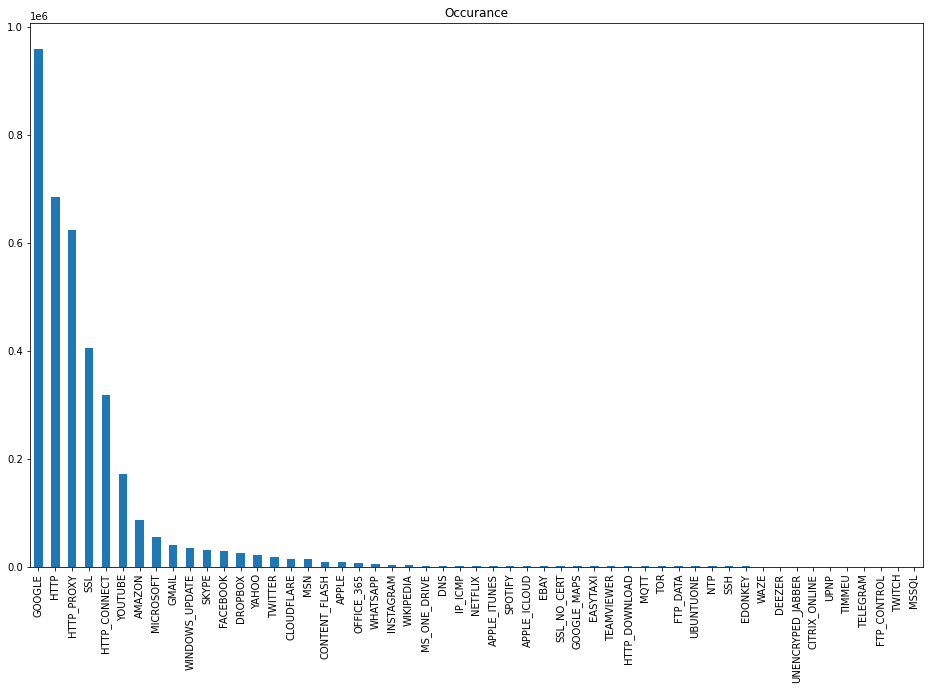

In [ ]:
# Plot the number of records for individual applications one more time after some application removal
target_count2 = df['ProtocolName'].value_counts()
plt.figure(figsize=(16,10))
target_count2.plot(kind='bar', title='Occurance');

In [ ]:
feature_names = ['Destination.IP', 'Destination.Port', 'Source.IP', 'Init_Win_bytes_forward',
 'min_seg_size_forward', 'Fwd.Packet.Length.Max', 'Init_Win_bytes_backward', 'Flow.IAT.Max',
 'Source.Port', 'Flow.Duration', 'Fwd.Packet.Length.Std', 'Bwd.IAT.Total',
 'Avg.Fwd.Segment.Size', 'Fwd.Packets.s', 'Fwd.IAT.Total', 'Fwd.IAT.Max',
 'Fwd.Packet.Length.Mean', 'Subflow.Fwd.Bytes', 'Flow.Bytes.s', 'Min.Packet.Length',
 'Total.Length.of.Fwd.Packets', 'Bwd.IAT.Max', 'Packet.Length.Variance', 'Bwd.Packets.s',
 'Flow.IAT.Mean','Bwd.IAT.Mean', 'Bwd.Packet.Length.Max', 'Subflow.Fwd.Packets', 'Total.Fwd.Packets',
 'Total.Backward.Packets', 'Bwd.Header.Length', 'Subflow.Bwd.Bytes', 'Subflow.Bwd.Packets', 
 'Idle.Mean', 'Fwd.IAT.Min', 'Down.Up.Ratio', 'Idle.Min']

In [ ]:
X = df[feature_names]
Y=df['ProtocolName']

In [ ]:
Y

0          HTTP_PROXY
1          HTTP_PROXY
2                HTTP
3                HTTP
4          HTTP_PROXY
              ...    
3577291           SSL
3577292           SSL
3577293           SSL
3577294           SSL
3577295           SSL
Name: ProtocolName, Length: 3577082, dtype: object

In [ ]:
# Convert application names to numbers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
Y=encoded_Y

In [ ]:
Y

array([22, 22, 19, ..., 36, 36, 36])

In [ ]:
print(X.shape)
print(encoded_Y.shape)

(3577082, 56)
(3577082,)


In [ ]:
X.head()

,Destination.IP,Destination.Port,Source.IP,Init_Win_bytes_forward,min_seg_size_forward,Fwd.Packet.Length.Max,Init_Win_bytes_backward,Flow.IAT.Max,Source.Port,Flow.Duration,...,Subflow.Fwd.Packets,Total.Fwd.Packets,Total.Backward.Packets,Bwd.Header.Length,Subflow.Bwd.Bytes,Subflow.Bwd.Packets,Idle.Mean,Fwd.IAT.Min,Down.Up.Ratio,Idle.Min
0,180881159,3128,2886926638,256,20,6,490,3880.0,52422,45523,...,22,22,55,1100,110414,55,0.0,698.0,2,0.0
1,2886926638,52422,180881159,490,20,6,-1,1.0,3128,1,...,2,2,0,0,0,0,0.0,1.0,0,0.0
2,180881369,38848,840939815,888,32,337,-1,1.0,80,1,...,3,3,0,0,0,0,0.0,0.0,0,0.0
3,180881369,38848,840939815,888,32,0,490,110.0,80,217,...,1,1,3,96,0,3,0.0,0.0,3,0.0
4,180881159,3128,3232253995,253,20,529,-1,54313.0,55961,78068,...,5,5,0,0,0,0,0.0,0.0,0,0.0


In [ ]:
Y

array([22, 22, 19, ..., 36, 36, 36])

In [ ]:
from collections import Counter
print(sorted(Counter(encoded_Y).items()))

[(0, 86875), (1, 7615), (2, 1200), (3, 1287), (4, 38), (5, 14737), (6, 8589), (7, 74), (8, 1695), (9, 25102), (10, 705), (11, 1192), (12, 95), (13, 29033), (14, 25), (15, 251), (16, 40260), (17, 959110), (18, 807), (19, 683734), (20, 317526), (21, 516), (22, 623210), (23, 2415), (24, 1631), (25, 54710), (26, 302), (27, 14478), (28, 21), (29, 1748), (30, 1560), (31, 135), (32, 5941), (33, 30657), (34, 1269), (35, 102), (36, 404883), (37, 856), (38, 527), (39, 33), (40, 34), (41, 276), (42, 24), (43, 18259), (44, 249), (45, 45), (46, 34), (47, 79), (48, 4593), (49, 2025), (50, 34471), (51, 21268), (52, 170781)]


In [ ]:
pip install np_utils

In [ ]:
from tensorflow.keras.utils import to_categorical
dummy_y = np_utils.to_categorical(Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.3, random_state = 42)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [ ]:
print ('y_train.shape:',format(y_train.shape))
print ('x_train.shape:',format(X_train.shape))
print ('y_test.shape:',format(y_test.shape))
print ('x_test.shape:',format(X_test.shape))
# print(len(x_train[0]))
print('x_train.shape[0]',X_train.shape[0])
print('x_train.shape[1]',X_train.shape[1])

y_train.shape: (2503957, 53)
x_train.shape: (2503957, 56)
y_test.shape: (1073125, 53)
x_test.shape: (1073125, 56)
x_train.shape[0] 2503957
x_train.shape[1] 56


In [ ]:
#REshaping the dataset
X_train=np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test=np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [ ]:
print ('x_train.shape:',format(X_train.shape))
print ('x_test.shape:',format(X_test.shape))

x_train.shape: (2503957, 1, 56)
x_test.shape: (1073125, 1, 56)


In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=input_shape, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',keras.metrics.Precision(), keras.metrics.Recall(), get_f1])

In [ ]:
%%time
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
39125/39125 [==============================] - 176s 4ms/step - loss: 1.0481 - acc: 0.6601 - precision: 0.7655 - recall: 0.5495 - get_f1: 0.6348 - val_loss: 0.8940 - val_acc: 0.7084 - val_precision: 0.7866 - val_recall: 0.6336 - val_get_f1: 0.7012
Epoch 2/10
39125/39125 [==============================] - 172s 4ms/step - loss: 0.8673 - acc: 0.7170 - precision: 0.7981 - recall: 0.6365 - get_f1: 0.7074 - val_loss: 0.8362 - val_acc: 0.7257 - val_precision: 0.8038 - val_recall: 0.6490 - val_get_f1: 0.7175
Epoch 3/10
39125/39125 [==============================] - 171s 4ms/step - loss: 0.8221 - acc: 0.7308 - precision: 0.8061 - recall: 0.6570 - get_f1: 0.7233 - val_loss: 0.8071 - val_acc: 0.7368 - val_precision: 0.8112 - val_recall: 0.6627 - val_get_f1: 0.7289
Epoch 4/10
39125/39125 [==============================] - 173s 4ms/step - loss: 0.7965 - acc: 0.7394 - precision: 0.8101 - recall: 0.6690 - get_f1: 0.7322 - val_loss: 0.7879 - val_acc: 0.7431 - val_precision: 0.8090 - val_reca

In [ ]:
%%time
loss, accuracy, precision, recall, f1 = model.evaluate(X_test, y_test, verbose=2)

33536/33536 - 79s - loss: 0.7445 - acc: 0.7575 - precision: 0.8147 - recall: 0.6969 - get_f1: 0.7502 - 79s/epoch - 2ms/step
CPU times: user 2min 28s, sys: 30 s, total: 2min 58s
Wall time: 1min 19s
